In [1]:
import cryo_em_select as cryo
from pathlib import Path
import os

model = cryo.CryoEmNet(batch_size=4, image_size=(224,224,3))
model.train(
    filepath=Path(str(os.getcwd())) / 'basic_model' / 'checkpoint',
    learning_rate=10 ** -2, 
    epochs=20)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 8)      32        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168  

In [10]:
%load_ext tensorboard
%tensorboard --logdir logs/cinderella_33/train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1096), started 1 day, 1:35:24 ago. (Use '!kill 1096' to kill it.)

1/1 [==============================] - 0s 415ms/step


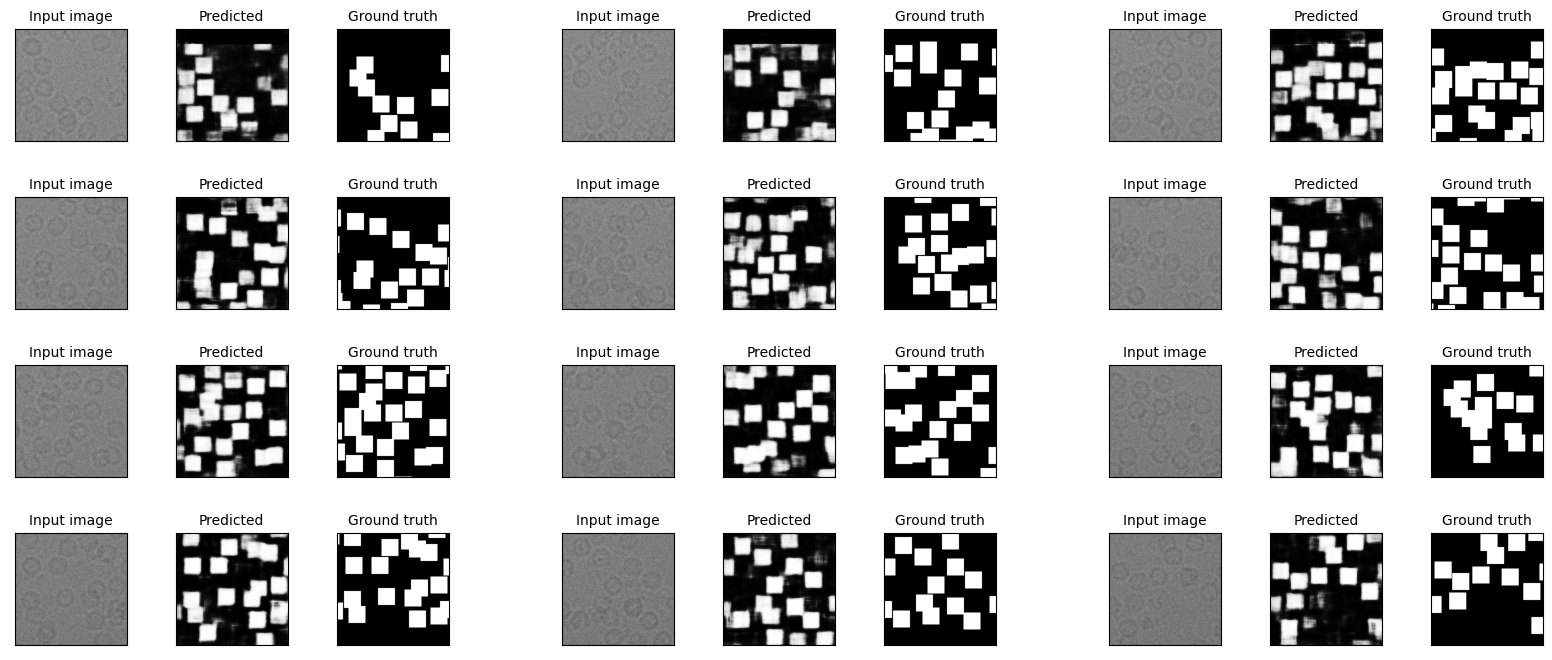

In [2]:
from pathlib import Path

path = Path('FoilHole_16384305_Data_16383479_16383481_20201016_164256_fractions.png')
model.show_predictions(path)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 8)      32        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168  

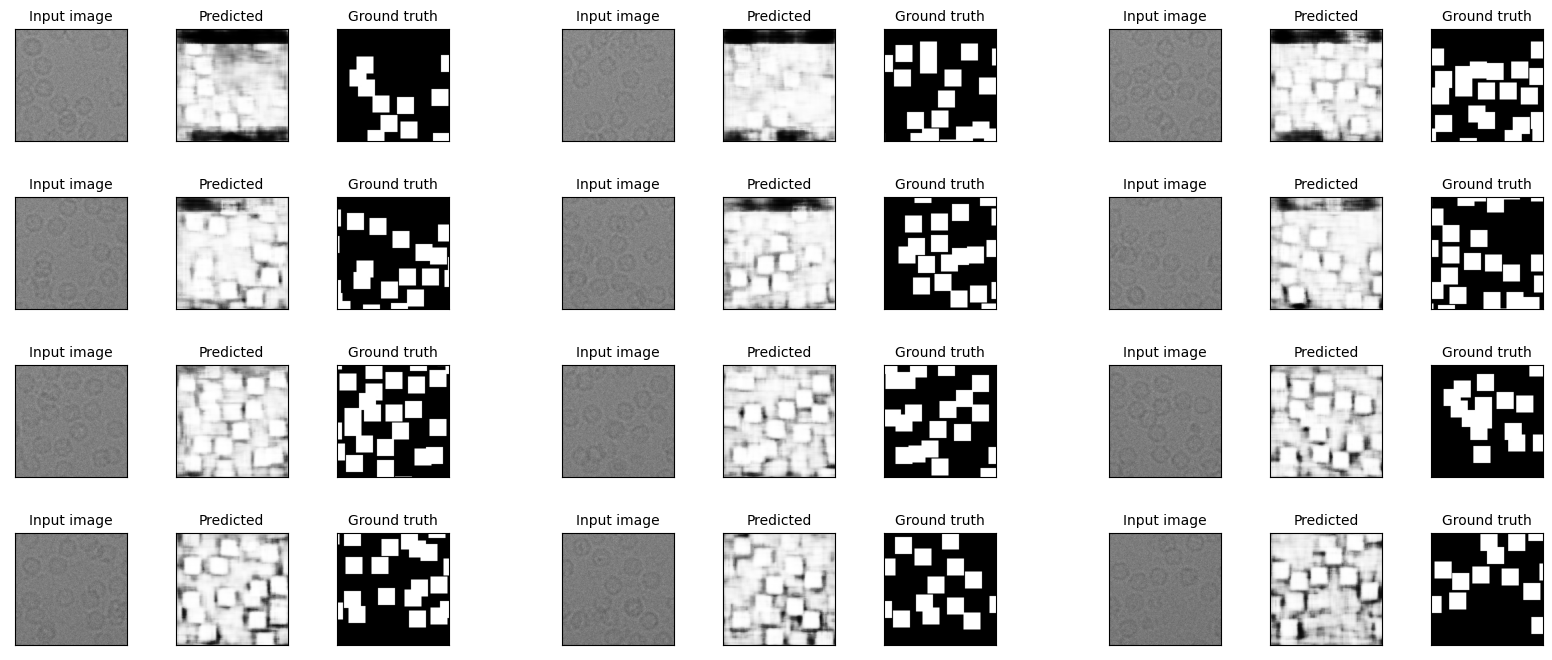

In [2]:
import cryo_em_select as cryo
model_loaded = cryo.CryoEmNet(batch_size=4, image_size=(224,224,3))
model_loaded.model.load_weights("model/checkpoint")

from pathlib import Path

path = Path('FoilHole_16384305_Data_16383479_16383481_20201016_164256_fractions.png')
model_loaded.show_predictions(path)

In [ ]:
import os
from pathlib import Path

p = Path(os.getcwd()) / 'output'

for file in p.iterdir():
    if file.suffix == '.csv':
        os.rename(str(file), os.path.join(os.getcwd(), 'data\\label_annotation', str(file.name)))
    else:
        os.rename(str(file), os.path.join(os.getcwd(), 'data\\raw_data', str(file.name)))